# The import of important functions
The following code changes the directory and imports all the functions we will be using today. It also defines all the variables we need

In [1]:
#Imports the functions, will change directory when I learn how
import laplacian_operations as lap
import matplotlib.pyplot as plt
import numpy as np

#Setting my constants for when I need them
seed = 42
R = 2
L = 20
BohrRad = 1

(np.float64(0.33260658130955706), np.float64(0.6736010178195437))


## The next step is to run both integrations
The steps we will take are n^x where x = integers 2-8

In [12]:
#My laptop isn't strong enough to run the python function at N=10^8 I'm going to need a bigger boat.
N_values = [10**2,10**3,10**4,10**5,10**6,10**7]
#Monty Carlo Results
MC_Results = []
MC_Results_STD = []
#Better Monty Carlo Results
BMC_Results = []
BMC_Results_STD = []

#Runs the integrations at each of the N_values and notes the results
for n_value in N_values:
    Avg, STD = lap.monty_carlo_ken(L, n_value)
    B_Avg, B_STD = lap.better_monty_carlo_ken(L, n_value)
    MC_Results.append(Avg)
    MC_Results_STD.append(STD)
    BMC_Results.append(B_Avg)
    BMC_Results_STD.append(B_STD)

## What should the integration be?
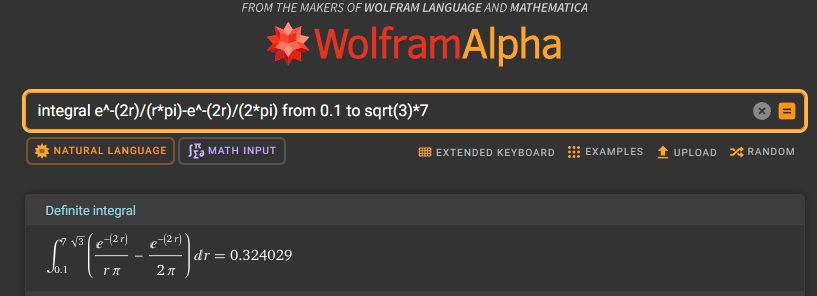
After placing the integral into wolfram alpha as a function of r the result we get a divergence. This is not suposed to happen, though I guess it makes since consdering the laplacian multiplies one value by 2/r. The reason I chose to integrate with respect to r instead of x,y, and z is because I don't have the pro vesion and the multivariable version is too complex to calculate without it. Since it diverges increasing the zeros before the 1 just causes the value to go up infinitly I chose to integrate from r = 0.1 to r = sqrt(3)*7 since I felt in order for r to be 0.1 or less all three values would have to be 0.0577 or less, which seemed unlikely even with importance sampling. This is likely why my gausian didn't appear to work, because it could sample lower r values since it was based on r instead of x^2 + y^2 + z^2.
If it is as I suspect a higher N should just increase the value and it will never truly converge.

# At last was the graph
With our values charted it's time to create a graph of the results to see how fast the importance sampled integration levels out compared to standard monty carlo

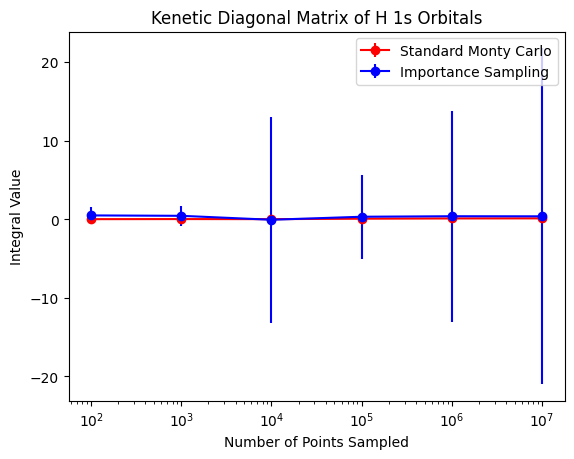

In [5]:
plt.errorbar(N_values, MC_Results, yerr=MC_Results_STD, fmt='o-', color= 'red', label= 'Standard Monty Carlo')
plt.errorbar(N_values, BMC_Results, yerr=BMC_Results_STD, fmt='o-', color= 'blue', label= 'Importance Sampling')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Kenetic Diagonal Matrix of H 1s Orbitals')
plt.legend()
plt.show()

## Adding R
I programed my functions to accept an R array representing the distance in bohr radii between atoms.
I will be running these at an N = 10^6 so that I don't need to run everything on my more powerful home PC

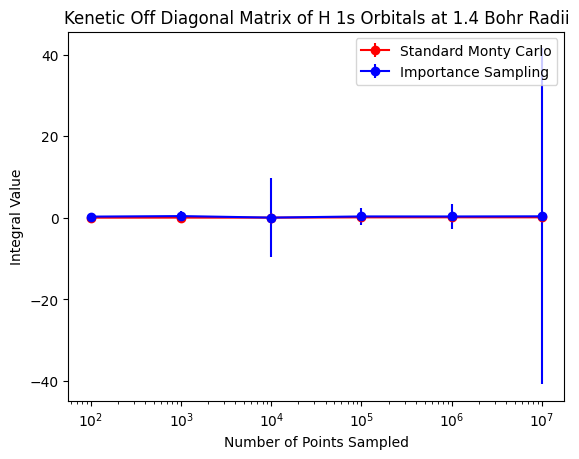

In [10]:

#A linespace of values 0.5 to 20 that are all 0.5 apart
R = [0,0,1.4]

#An array to store the disired data
OD_Results = []
OD_Results_STD = []
BOD_Results = []
BOD_Results_STD = []

#Runs the integrations at each of the N_values with the new R array and notes the results
for n_value in N_values:
    ODAvg, ODSTD = lap.monty_carlo_ken(L, n_value, R)
    ODB_Avg, ODB_STD = lap.better_monty_carlo_ken(L, n_value, R)
    OD_Results.append(ODAvg)
    OD_Results_STD.append(ODSTD)
    BOD_Results.append(ODB_Avg)
    BOD_Results_STD.append(ODB_STD)

plt.errorbar(N_values, OD_Results, yerr=OD_Results_STD, fmt='o-', color= 'red', label= 'Standard Monty Carlo')
plt.errorbar(N_values, BOD_Results, yerr=BOD_Results_STD, fmt='o-', color= 'blue', label= 'Importance Sampling')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Kenetic Off Diagonal Matrix of H 1s Orbitals at 1.4 Bohr Radii')
plt.legend()
plt.show()

# A closer look
It appears that the error bars are not only massive, but obfuscating my results. The reason for the massive values is likely that the function diverges as predicted by Wolfram alpha, since there are a few crazy large values it creates a masive standard deviation, and thus massive error. Here are the graphs with error removed:

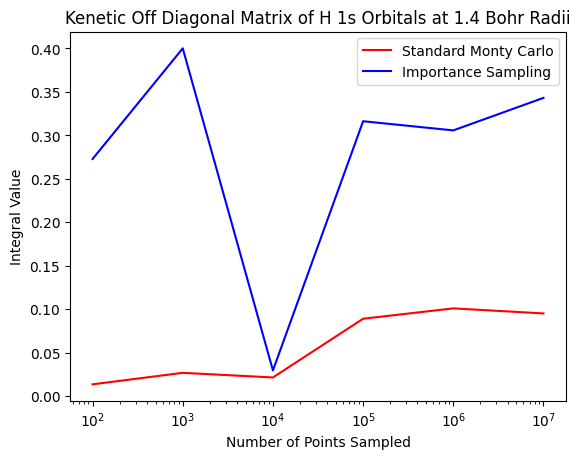

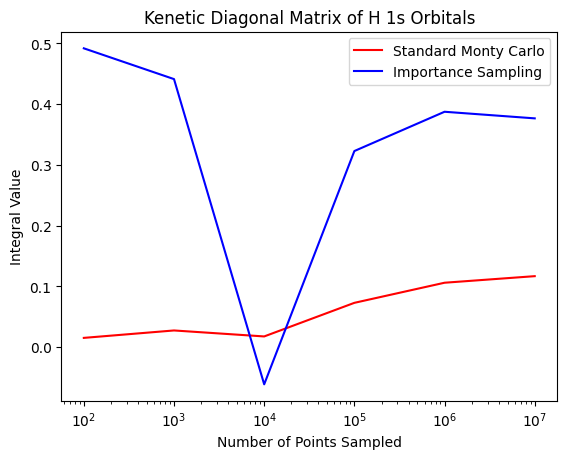

In [13]:
plt.plot(N_values, OD_Results, linestyle='-', color= 'red', label= 'Standard Monty Carlo')
plt.plot(N_values, BOD_Results, linestyle='-', color= 'blue', label= 'Importance Sampling')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Kenetic Off Diagonal Matrix of H 1s Orbitals at 1.4 Bohr Radii')
plt.legend()
plt.show()
plt.plot(N_values, MC_Results, linestyle='-', color= 'red', label= 'Standard Monty Carlo')
plt.plot(N_values, BMC_Results, linestyle='-', color= 'blue', label= 'Importance Sampling')
plt.xscale('log')
plt.xlabel('Number of Points Sampled')
plt.ylabel('Integral Value')
plt.title('Kenetic Diagonal Matrix of H 1s Orbitals')
plt.legend()
plt.show()

# The Graphs
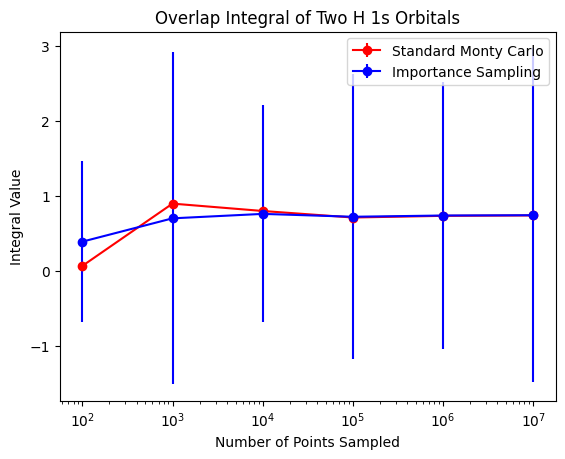
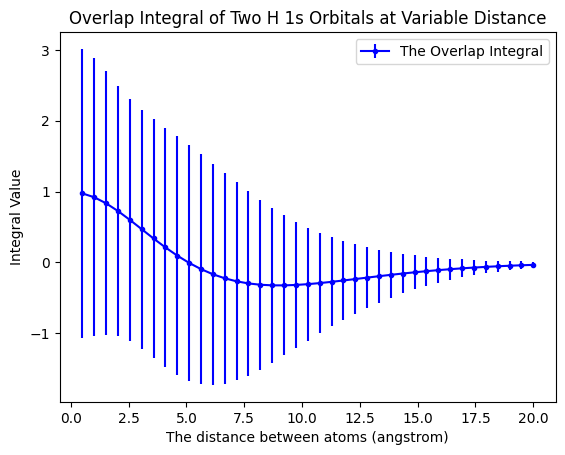

## What are the Differences with Importance Sampling

Importance sampling causes the value to reach it's plateu at in a lower number of steps than without importance sampling. With importance sampling the integration plateus at 10^4 instead of 10^6. One interesting thing is that the importance sampling had a higher error. I think the reson for this is because the standard monty carlo had a large number of zeros from the end of the integration, which means that there are alot of values that are the same. This results in a lower standard deviation, wheras the importance sampling has a much larger amount of non zero values, which increases standard deviation.

## What's the deal with increasing distances

At far enough distances the overlap between orbitals is 0. This makes since because no interaction would happen if the orbitals were too far apart. The weirdness happens when the orbitals are about 8 angstrom apart. This means that at this distance the destructive wave overlap overpowers the constructive wave overlap. My beilef for why this ocurs is at a closer distance the hydrogen atoms are able to force themselves into phase with one another, but at larger distances, they are just very likely to be out of phase, which results in a negitive sign and antibonding effect.